Calculating $\pi$ using Monte-Carlo Simulation
-------
One of the solutions to the problem statement $\textbf{7.17}$ in $\textbf{10th}$ edition of Operating System Concepts by ABRAHAM SILBERSCHATZ, PETER BAER GALVIN, GREG GAGNE using Python

Inspiration for the code is taken from Andew Dotson's YouTube video for calculating $\pi$ i.e $\textit{How to Estimate Pi Numerically in Python}$(https://www.youtube.com/watch?v=JjfrNc-G-zA&ab_channel=AndrewDotson)

Prerequisites / Import statements
--------
------------

In [2]:
import numpy as np
from numpy import random
import threading
from threading import Lock
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import time

Multithreaded Version of Monte-Carlo Simulation to calculate $\pi$ using multiple child threads
--------
Using a **single parent thread** that invokes **multiple child threads**, which simulate the points and update a global variable to be used by the parent thread to calculate $\pi$

Computation time of child_thread1 = 2.875563999999997msComputation time of child_thread2 = 2.9687830000000304ms

Computation time of child_thread3 = 2.8853110000000015ms
Computation time of child_thread4 = 2.923368999994125ms
Pi we estimated : 3.1364
Computation time of parent_thread = 15.456114999999215ms
Actual Pi : 3.141592653589793


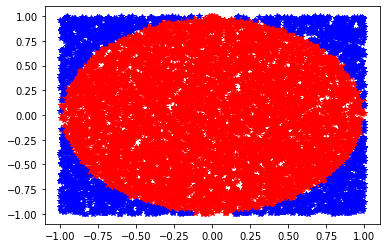

In [22]:
mutex = Lock()
n_points = 10000
rectx = []
recty = []
circlex = []
circley = []
our_pi = 0
total_points = n_points
circle_points = 0
'''
Gets random points within the square (-1,0);(0,-1);(1,0);(0,1)
And also checks if it lies within the circle (that is the circle of max area inscribed in this square) and square or just the square
This function also protects against race condition
 '''
def get_points(eachThread_points, thread_num):
  mutex.acquire() 
  global circle_points
  tic = time.process_time()
  for i in range(eachThread_points) :
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
    temp = x**2 + y**2
    if(temp<=1) :
      circlex.append(x)
      circley.append(y)
      circle_points = circle_points + 1
    else :
      rectx.append(x)
      recty.append(y)
  mutex.release()
  toc = time.process_time()
  print("Computation time of child_thread"+str(thread_num)+" = "+str(1000*(toc - tic ))+"ms")

'''
  Each of the child thread will create some number of random points and then circle_points is updated 
  by each child thread, so that we can calculated how many points lie in circle.
  For protecting against race condition, I am using Locks.
  '''
def get_pi(n_points):
  eachThread_points = int(n_points/4)
  child_thread1 = threading.Thread(target = get_points, args=(eachThread_points,1,))    
  child_thread2 = threading.Thread(target = get_points, args=(eachThread_points,2,))    
  child_thread3 = threading.Thread(target = get_points, args=(eachThread_points,3,))    
  child_thread4 = threading.Thread(target = get_points, args=(eachThread_points,4,))
  child_thread1.start()
  child_thread2.start()
  child_thread3.start()
  child_thread4.start()
  our_pi = 4*(circle_points/total_points)
  print("Pi we estimated : " + str(our_pi))

parent_thread = threading.Thread(target=get_pi,args=(n_points,))
parent_thread.start()
tic = time.process_time()
parent_thread.join()
toc = time.process_time()
print("Computation time of parent_thread = "+str(1000*(toc - tic ))+"ms")
print("Actual Pi : " + str(np.pi))

# Plot
plt.plot(circlex,circley,'r*')
plt.plot(rectx,recty,'b*')